# 导师制名企实训班商业智能方向 004期 Lesson 8

### Thinking 1: 为什么股票预测问题容易出现过拟合，也就是在训练时结果很好，在真实环境中结果没那么好

股票预测问题在训练时利用的信息相对较少，在真实情况下，股票的涨跌受到众多因素影响并且伴随很多无法预测的突发事件，这使得在训练的时候很难区分是否为噪声信息，所以在训练时容易出现过拟合问题。

### Thinking 2: Prophet与ARMA/ARIMA相比，优势在哪些地方

ARMA方法要求时序数据是稳定的，现实数据通常不是稳定的。ARIMA模型为线性模型，无法处理非线性关系，同时要求数据点的间隔等长。如果数据缺失，则需要使用插值等方法来预估缺失值，然后再使用预估值来进行参数拟合，这样会引入噪音。ARMA和ARIMA模型都需要进行参数探索，在实际应用中很难确定最优的参数，模型效果受到很大限制。Prophet可以拟合非线性的周期趋势，并且能够更方便的进行预测模型的建立，其参数是比较符合直觉的，相对来说更加容易理解，对于突发事件也能够通过认为设定来减少影响。

### Action 1: 交通流量预测
JetRail高铁的乘客数量预测  
数据集：jetrail.csv，根据过往两年的数据（2012 年 8 月至 2014 年 8月），需要用这些数据预测接下来 7 个月的乘客数量  
以每天为单位聚合数据集  

In [1]:
import pandas as pd

In [2]:
# 数据加载
train = pd.read_csv('data/train.csv')
train

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [3]:
# 转换为pandas中的日期格式
train['Datetime'] = pd.to_datetime(train['Datetime'], format='%d-%m-%Y %H:%M')
train

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2
...,...,...,...
18283,18283,2014-09-25 19:00:00,868
18284,18284,2014-09-25 20:00:00,732
18285,18285,2014-09-25 21:00:00,702
18286,18286,2014-09-25 22:00:00,580


In [4]:
# 将Datetime作为train的索引
train.index = train['Datetime']
train

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2
...,...,...,...
2014-09-25 19:00:00,18283,2014-09-25 19:00:00,868
2014-09-25 20:00:00,18284,2014-09-25 20:00:00,732
2014-09-25 21:00:00,18285,2014-09-25 21:00:00,702


In [5]:
# 去掉 ID, Datetime字段
train.drop(['ID', 'Datetime'], axis=1, inplace=True)
train

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2
...,...
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702


In [6]:
# 按照天进行重采样
daily_train = train.resample('D').sum()
daily_train

,Count
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60
...,...
2014-09-21,9102
2014-09-22,14116
2014-09-23,13304


In [7]:
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train['Count']
daily_train.drop(['Count'], axis=1, inplace=True)
daily_train

,ds,y
Datetime,,
2012-08-25,2012-08-25,76
2012-08-26,2012-08-26,88
2012-08-27,2012-08-27,62
2012-08-28,2012-08-28,58
2012-08-29,2012-08-29,60
...,...,...
2014-09-21,2014-09-21,9102
2014-09-22,2014-09-22,14116
2014-09-23,2014-09-23,13304


In [12]:
from fbprophet import Prophet
# 拟合prophet模型
m = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1)
# 拟合数据
m.fit(daily_train)
# 预测未来7个月，213天
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future)

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


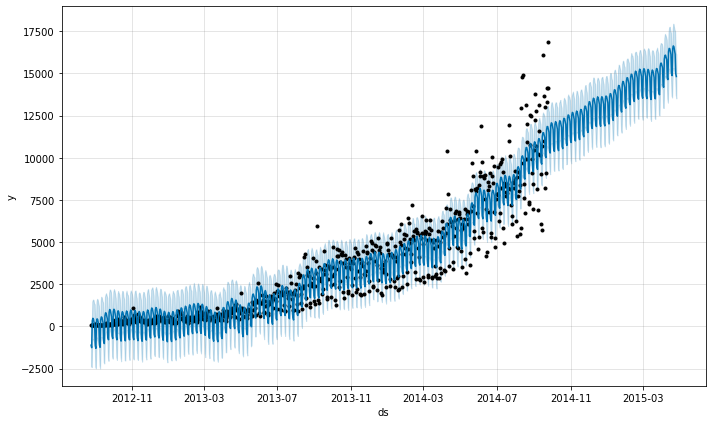

In [14]:
_ = m.plot(forecast)

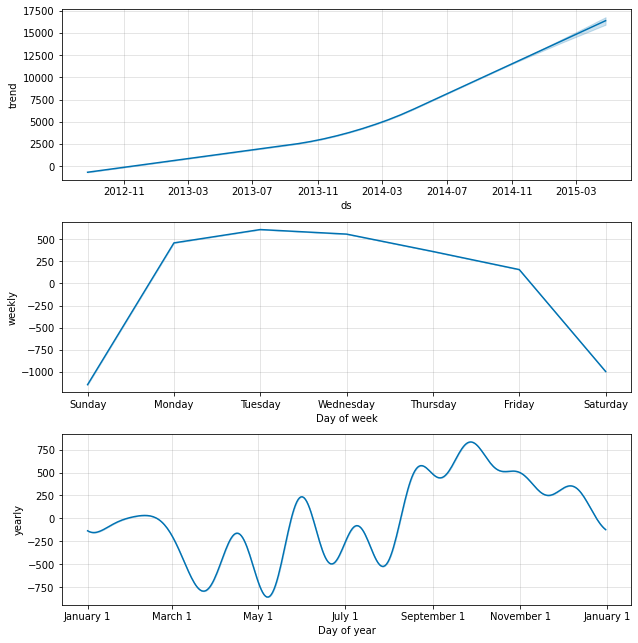

In [15]:
# 查看各个components
_ = m.plot_components(forecast)

### 不按天进行重采样

In [16]:
train['ds'] = train.index
train['y'] = train['Count']
train.drop(['Count'], axis=1, inplace=True)
train

,ds,y
Datetime,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8
2012-08-25 01:00:00,2012-08-25 01:00:00,2
2012-08-25 02:00:00,2012-08-25 02:00:00,6
2012-08-25 03:00:00,2012-08-25 03:00:00,2
2012-08-25 04:00:00,2012-08-25 04:00:00,2
...,...,...
2014-09-25 19:00:00,2014-09-25 19:00:00,868
2014-09-25 20:00:00,2014-09-25 20:00:00,732
2014-09-25 21:00:00,2014-09-25 21:00:00,702


In [17]:
# 拟合prophet模型
m2 = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1)
# 拟合数据
m2.fit(train)
# 预测未来7个月，213天
future = m2.make_future_dataframe(periods=213)
forecast = m2.predict(future)

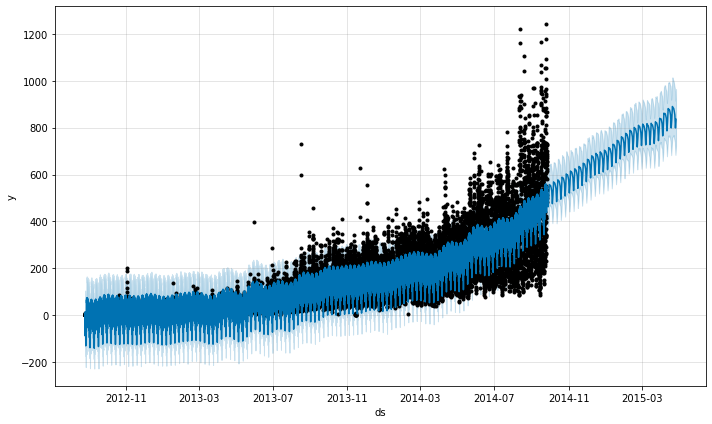

In [18]:
_ = m2.plot(forecast)

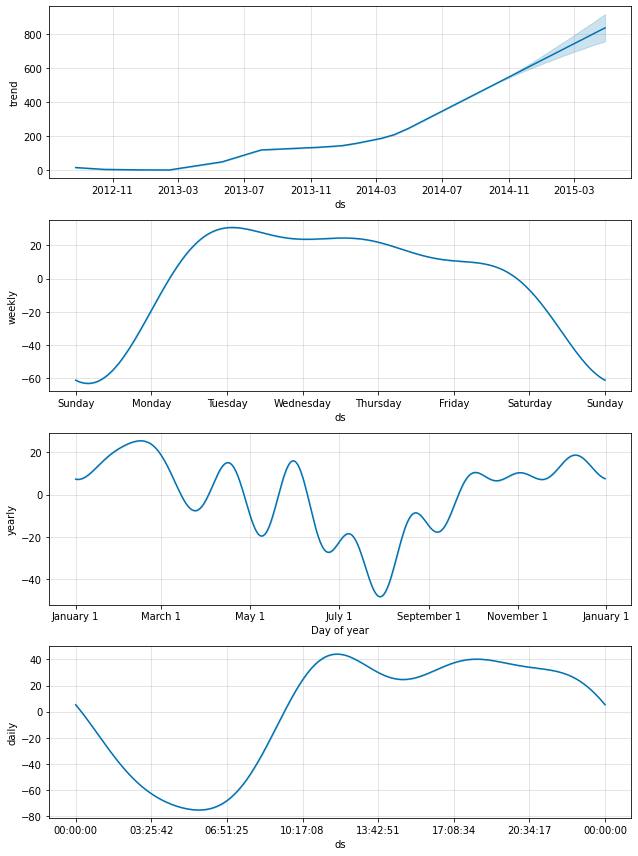

In [19]:
# 查看各个components
_ = m2.plot_components(forecast)